In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Read data
train_data = pd.read_csv("output.csv")

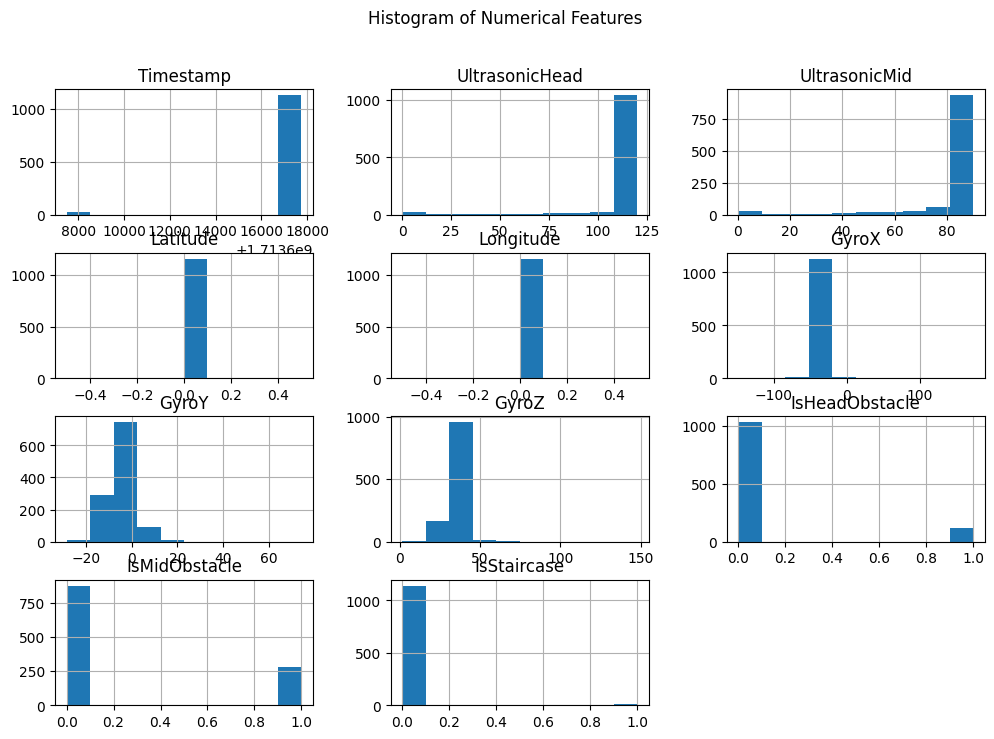

In [3]:
# Plot histogram of numerical features
train_data.hist(figsize=(12, 8))
plt.suptitle("Histogram of Numerical Features")
plt.show()

In [4]:
# Select relevant columns
columns_to_keep = ["Timestamp", "UltrasonicMid"]
train_data = train_data[columns_to_keep]

In [5]:
# Convert Timestamp to datetime
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'], unit='s')


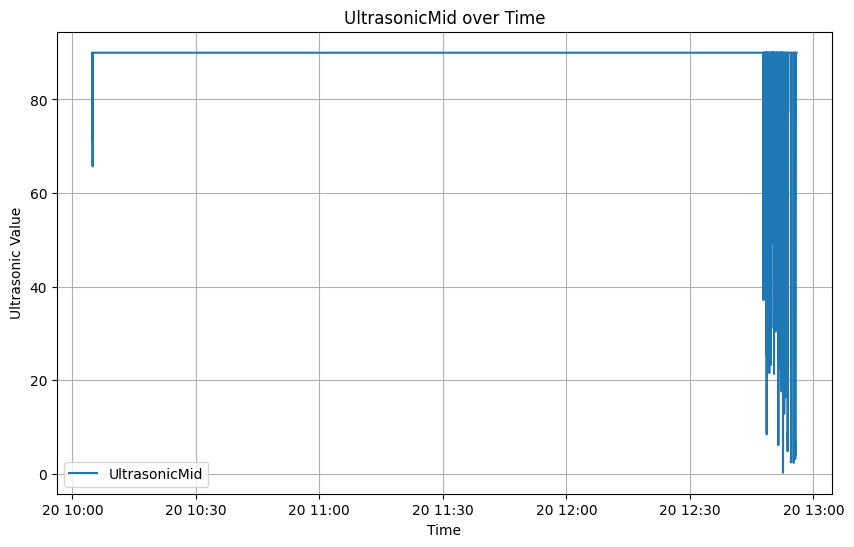

In [6]:
# Plot UltrasonicMid against Timestamp
plt.figure(figsize=(10, 6))
plt.plot(train_data['Timestamp'], train_data['UltrasonicMid'], label='UltrasonicMid')
plt.xlabel('Time')
plt.ylabel('Ultrasonic Value')
plt.title('UltrasonicMid over Time')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Feature Engineering: Calculate sequential changes in ultrasonic readings
train_data['UltrasonicMid_diff'] = train_data['UltrasonicMid'].diff()

In [8]:
# Labeling Anomalies: Define anomalies based on criteria (e.g., sequential change threshold)
threshold_mid = 0  # Change this threshold as needed
train_data['AnomalyMid'] = train_data['UltrasonicMid_diff'].abs() > threshold_mid

In [9]:
# Prepare features and labels
X = train_data[['UltrasonicMid_diff']]
y_mid = train_data['AnomalyMid']


In [10]:
# Split data into training and testing sets
X_train, X_test, y_train_mid, y_test_mid = train_test_split(X, y_mid, test_size=0.2, random_state=42)

In [11]:
# Model Training and Evaluation: Random Forest for UltrasonicMid sensor
rf_classifier_mid = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_mid.fit(X_train, y_train_mid)
y_pred_mid_rf = rf_classifier_mid.predict(X_test)
print("Random Forest Accuracy (UltrasonicMid):", accuracy_score(y_test_mid, y_pred_mid_rf))
print("Confusion Matrix (UltrasonicMid):\n", confusion_matrix(y_test_mid, y_pred_mid_rf))

Random Forest Accuracy (UltrasonicMid): 1.0
Confusion Matrix (UltrasonicMid):
 [[151   0]
 [  0  80]]


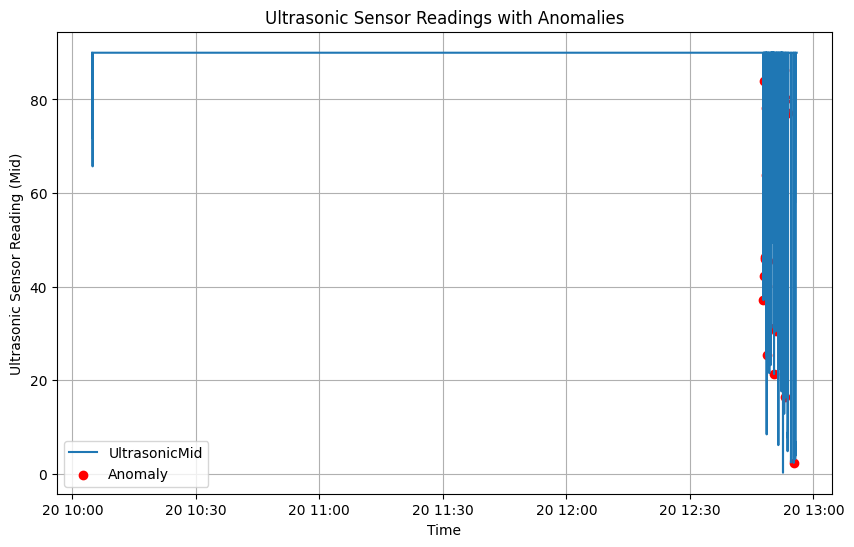

In [16]:
# Initialize list to store anomalies
anomalies = []

# Iterate through the sensor readings
for i in range(1, len(train_data) - 1):
    current_reading = train_data['UltrasonicMid'].iloc[i]
    previous_reading = train_data['UltrasonicMid'].iloc[i - 1]
    next_reading = train_data['UltrasonicMid'].iloc[i + 1]
    
    # Check if current reading is below 90 cm and previous and next readings are 90 cm
    if current_reading < 90 and previous_reading == 90 and next_reading == 90:
        anomalies.append(i)

# Plot UltrasonicMid against Timestamp
plt.figure(figsize=(10, 6))
plt.plot(train_data['Timestamp'], train_data['UltrasonicMid'], label='UltrasonicMid')

# Plot anomalies
plt.scatter(train_data['Timestamp'].iloc[anomalies], train_data['UltrasonicMid'].iloc[anomalies], color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Ultrasonic Sensor Reading (Mid)')
plt.title('Ultrasonic Sensor Readings with Anomalies')
plt.legend()
plt.grid(True)
plt.show()

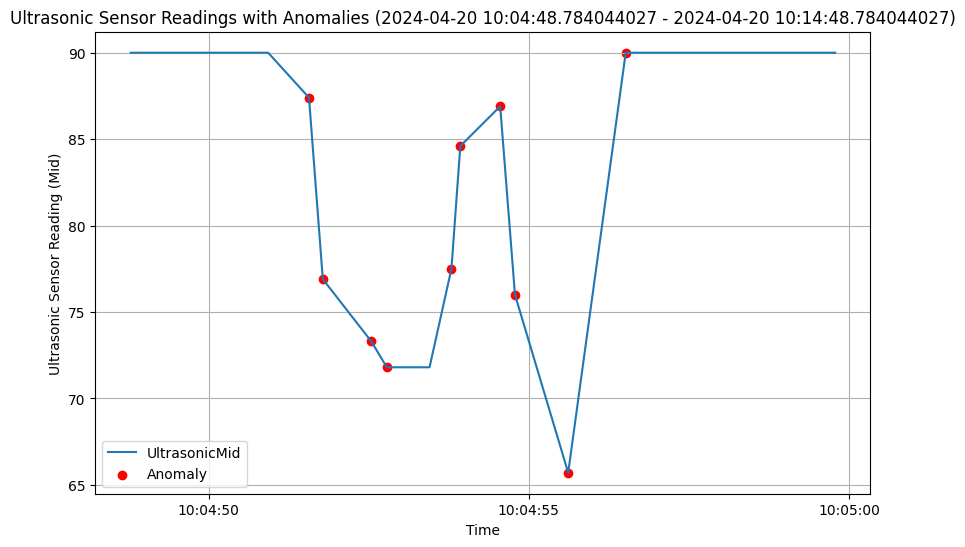

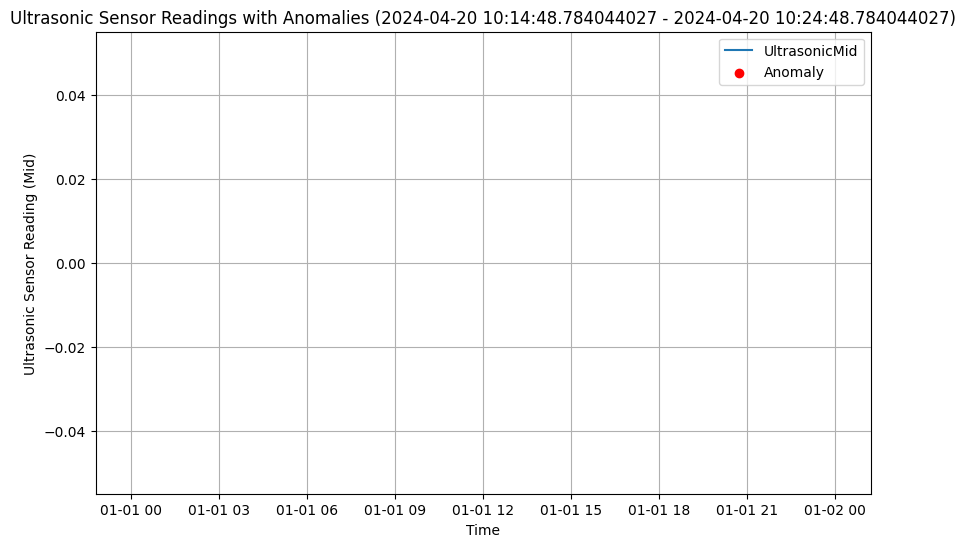

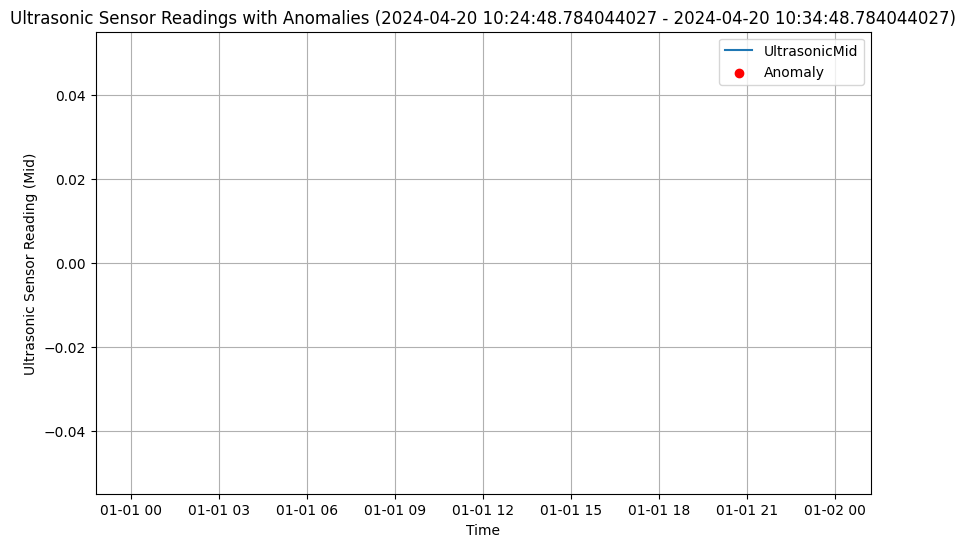

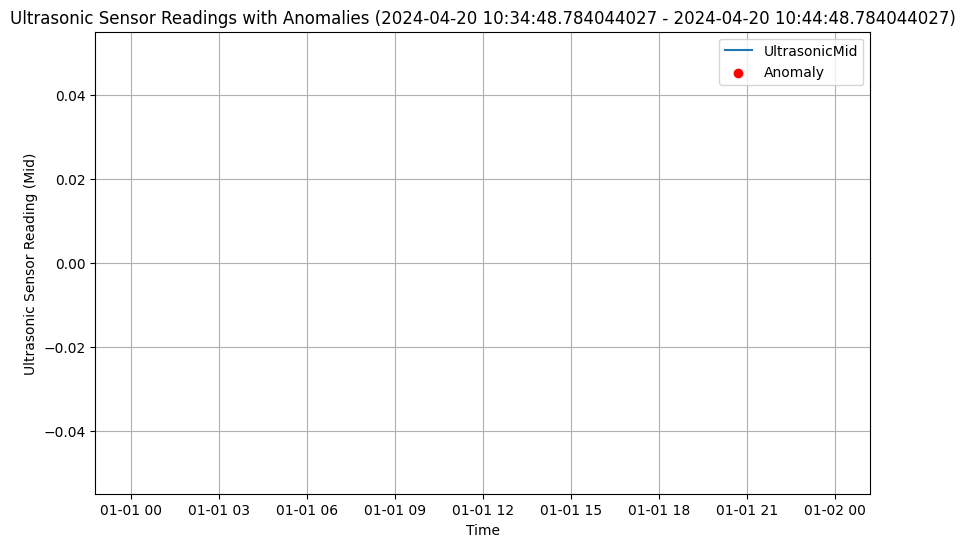

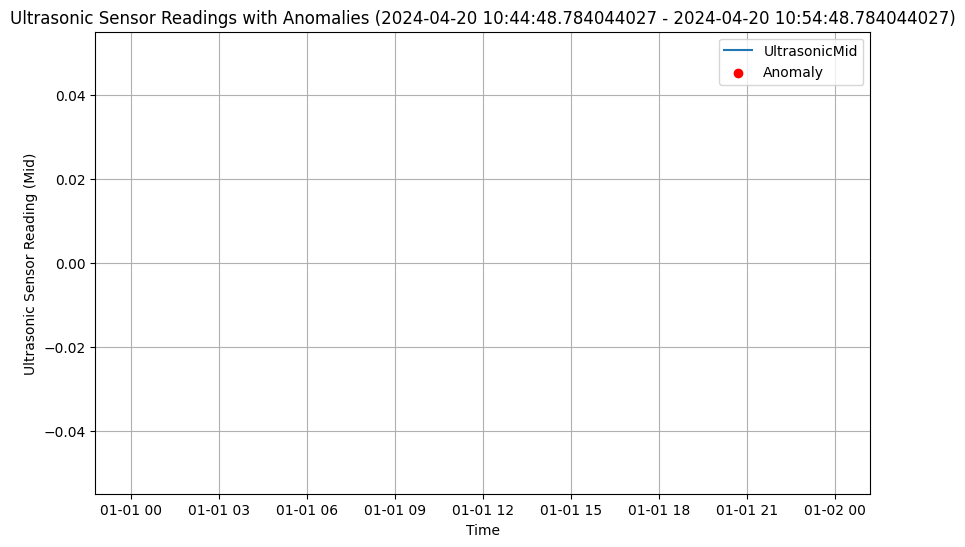

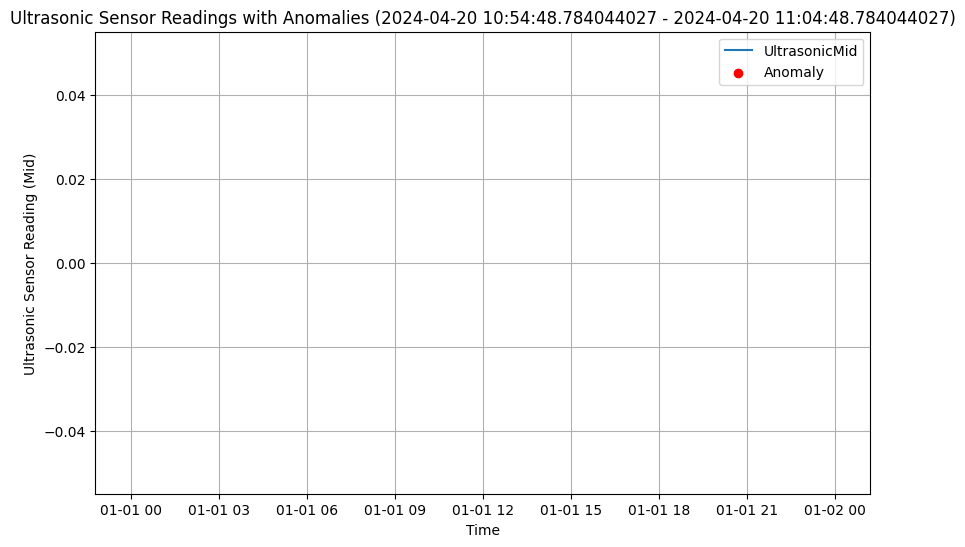

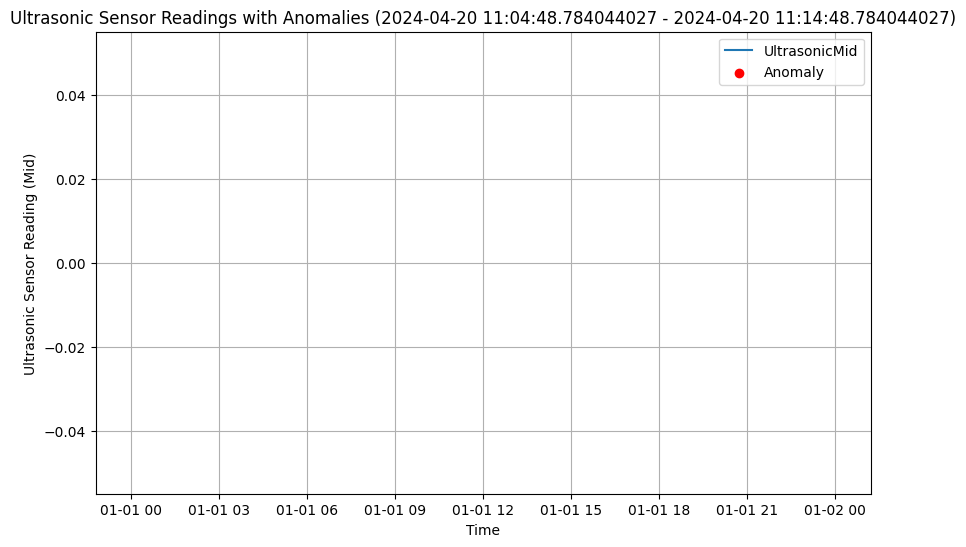

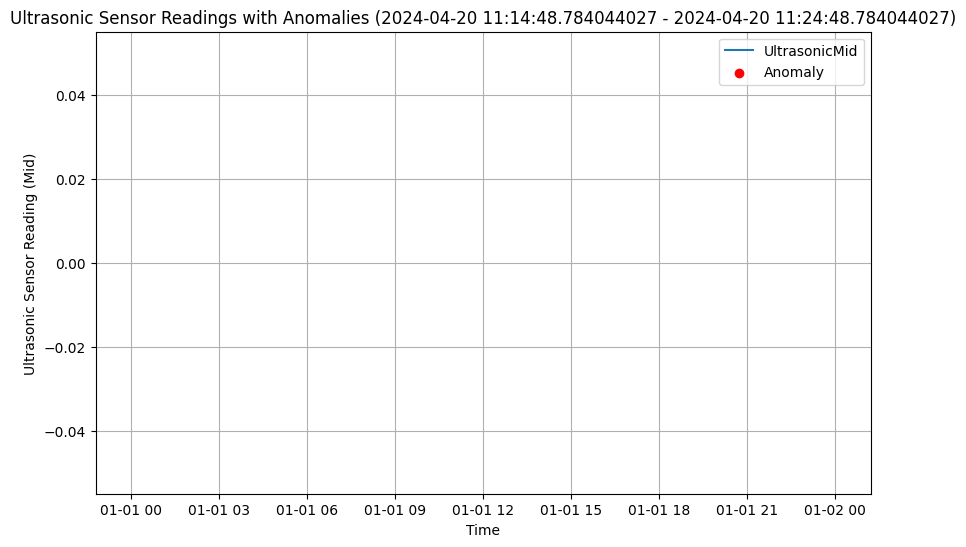

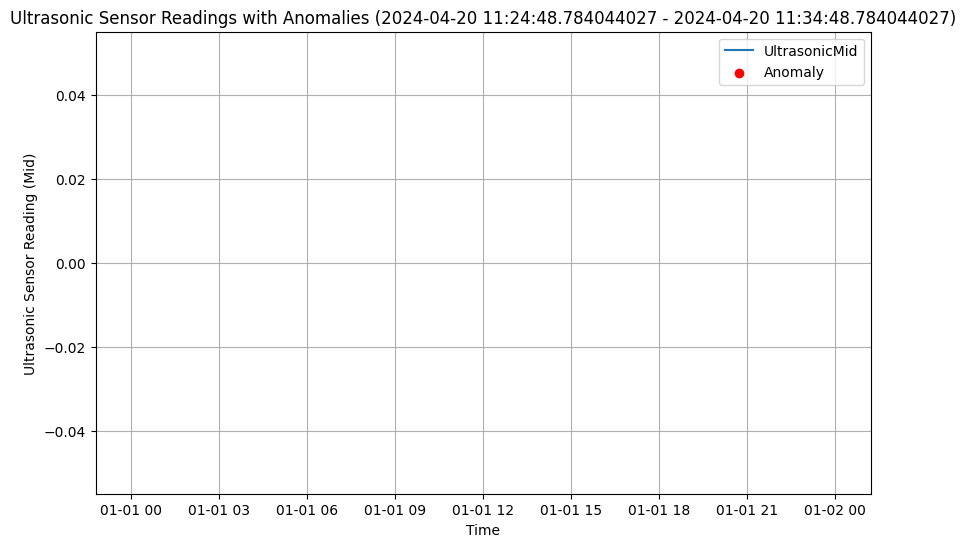

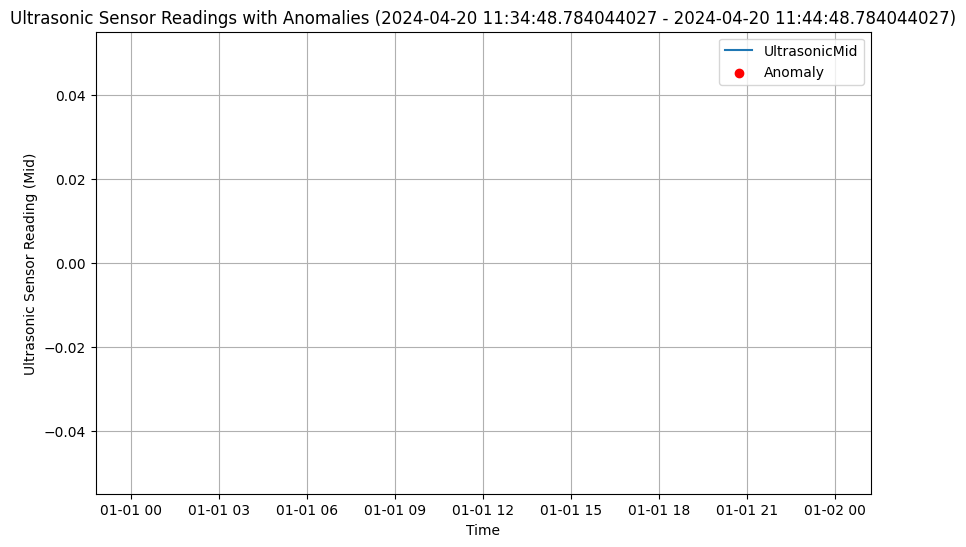

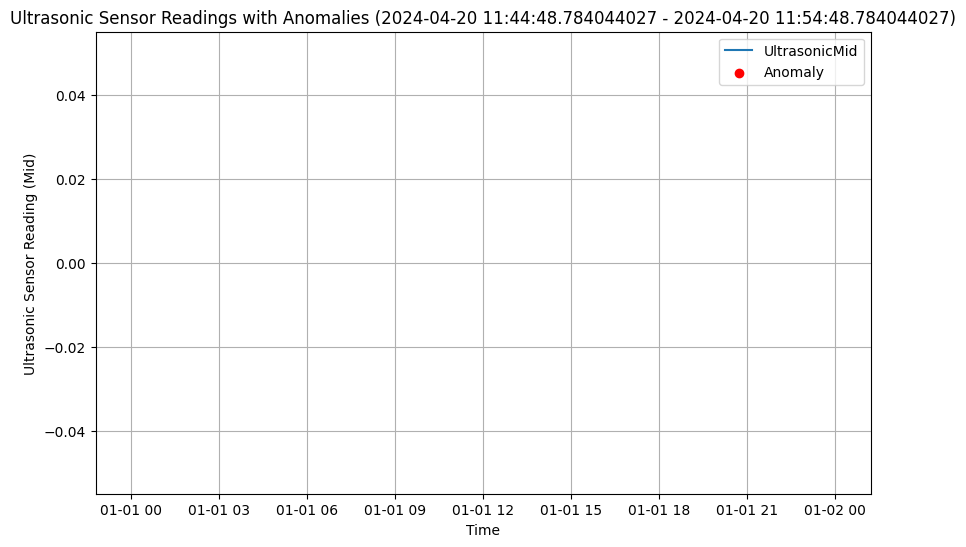

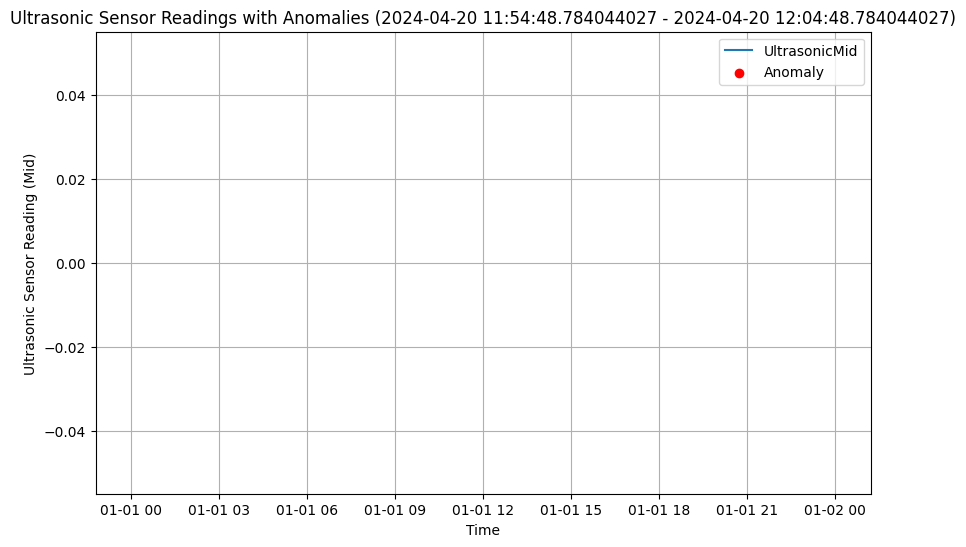

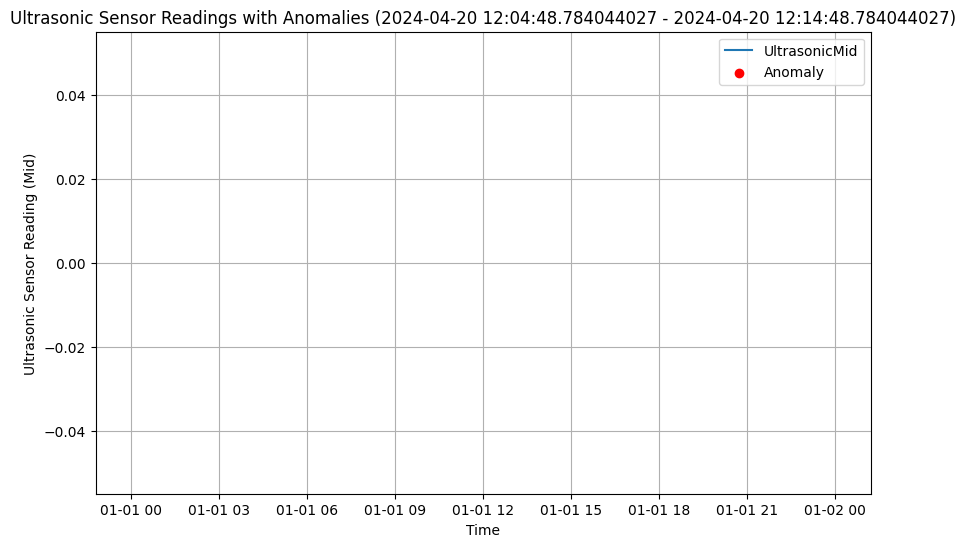

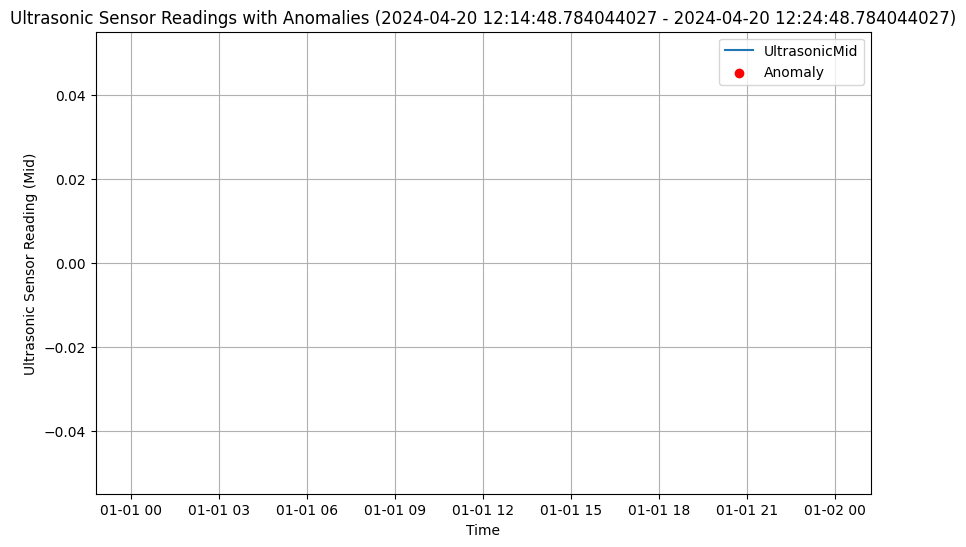

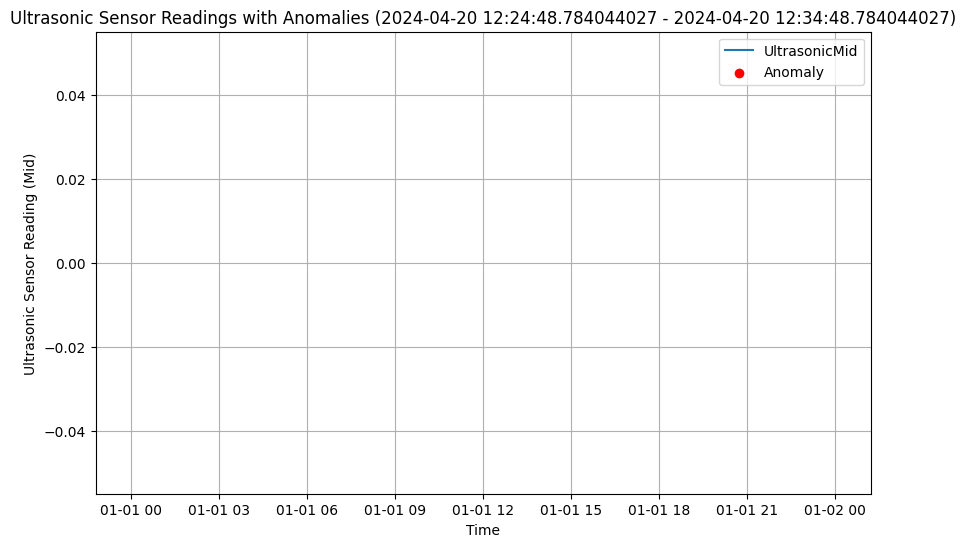

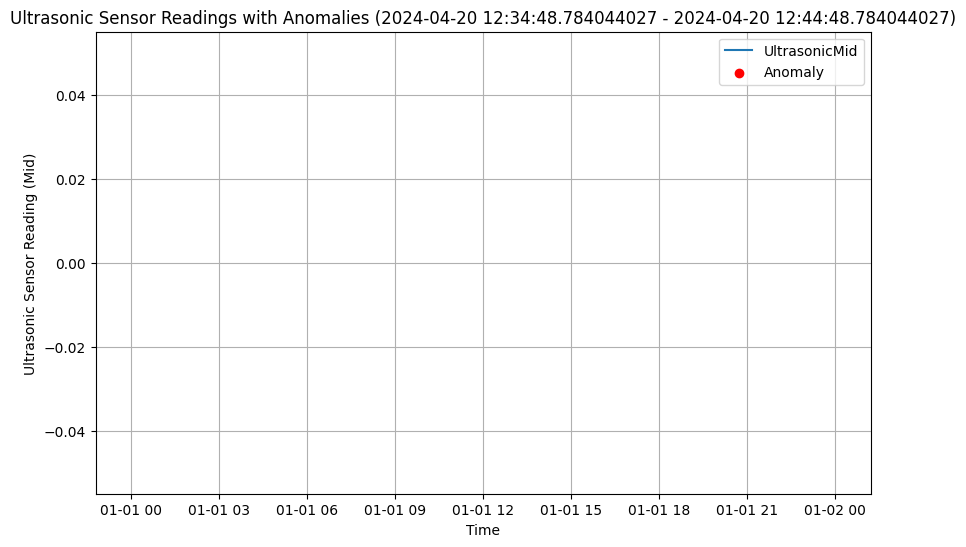

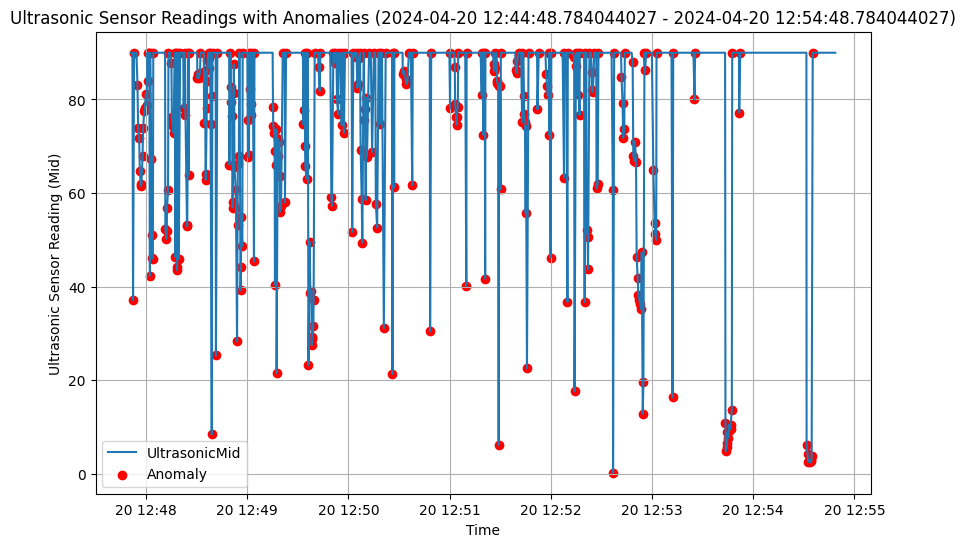

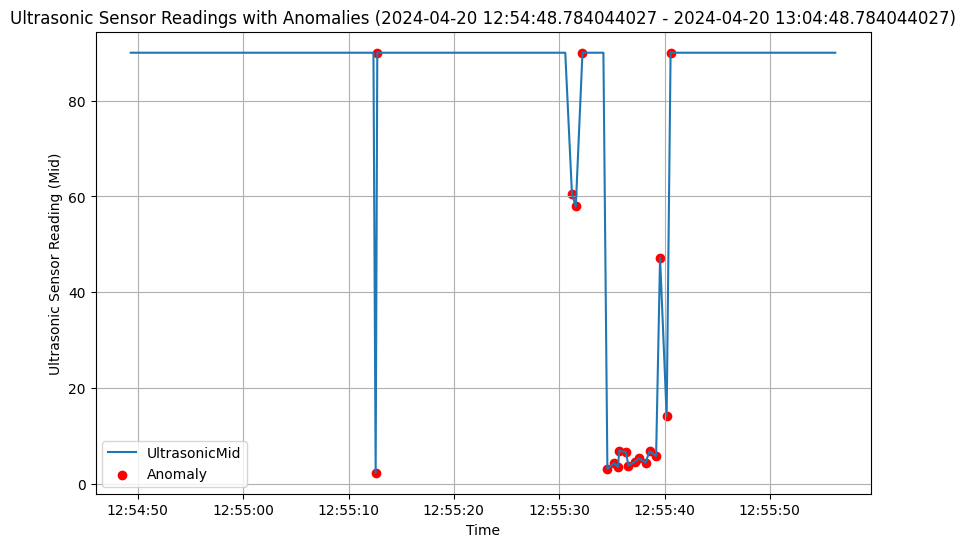

In [15]:
import numpy as np

# Get the start and end timestamps
start_time = train_data['Timestamp'].min()
end_time = train_data['Timestamp'].max()

# Define the interval length (3 minutes)
interval_length = pd.Timedelta(minutes=10)

# Iterate over the time range in 3-minute intervals
current_time = start_time
while current_time <= end_time:
    # Define the time range for this interval
    end_interval = current_time + interval_length
    
    # Select the data within the current interval
    interval_data = train_data[(train_data['Timestamp'] >= current_time) & (train_data['Timestamp'] < end_interval)]
    
    # Plot the interval data
    plt.figure(figsize=(10, 6))
    plt.plot(interval_data['Timestamp'], interval_data['UltrasonicMid'], label='UltrasonicMid')
    
    # Plot anomalies within the interval
    interval_anomalies = interval_data[interval_data['AnomalyMid']]
    plt.scatter(interval_anomalies['Timestamp'], interval_anomalies['UltrasonicMid'], color='red', label='Anomaly')
    
    plt.xlabel('Time')
    plt.ylabel('Ultrasonic Sensor Reading (Mid)')
    plt.title(f'Ultrasonic Sensor Readings with Anomalies ({current_time} - {end_interval})')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Move to the next interval
    current_time = end_interval


In [13]:
import pandas as pd

# Select rows corresponding to anomalies
anomaly_data = train_data.iloc[anomalies].copy()

# Add column for anomalies
anomaly_data['Anomaly'] = True

# Create a DataFrame for non-anomalies
non_anomaly_data = train_data[~train_data.index.isin(anomalies)].copy()
non_anomaly_data['Anomaly'] = False

# Concatenate anomaly and non-anomaly DataFrames
final_data = pd.concat([anomaly_data, non_anomaly_data])

# Convert timestamp to datetime
final_data['Timestamp'] = pd.to_datetime(final_data['Timestamp'], unit='s')

# Sort DataFrame by timestamp
final_data.sort_values(by='Timestamp', inplace=True)

# Write DataFrame to CSV with required columns
final_data[['Timestamp', 'UltrasonicMid', 'Anomaly']].to_csv("anomaly_data.csv", index=False)
